# SciPy

# PDF and CDF

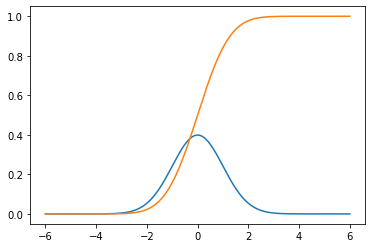

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# You can also import `beta` or `gamma` if you are interested in those distributions
from scipy.stats import norm

x = np.linspace(-6, 6, 1000)
fx = norm.pdf(x, loc=0, scale=1)  # locs=mean, scale=standard deviation
plt.plot(x, fx);

Fx = norm.cdf(x, loc=0, scale=1)
plt.plot(x, Fx);

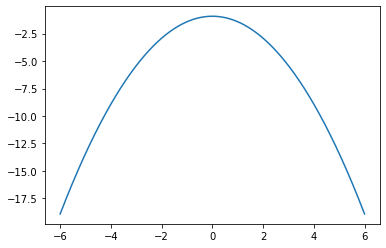

In [7]:
logfx = norm.logpdf(x, loc=0, scale=1)
plt.plot(x, logfx);

# Convolution

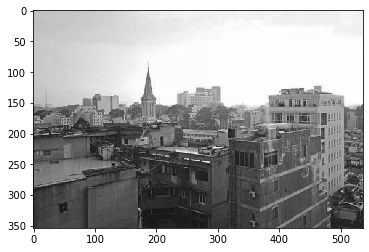

In [20]:
# Example of convolution by applying a blurring filter convolution

from PIL import Image
im = Image.open('img/section-3-matplotlib/dummy-image.jpeg')

gray = np.mean(im, axis=2)
plt.imshow(gray, cmap='gray')

array([[3.69163524e-17, 1.55719274e-16, 6.18613137e-16, ...,
        6.18613137e-16, 1.55719274e-16, 3.69163524e-17],
       [1.55719274e-16, 6.56849623e-16, 2.60941242e-15, ...,
        2.60941242e-15, 6.56849623e-16, 1.55719274e-16],
       [6.18613137e-16, 2.60941242e-15, 1.03661979e-14, ...,
        1.03661979e-14, 2.60941242e-15, 6.18613137e-16],
       ...,
       [6.18613137e-16, 2.60941242e-15, 1.03661979e-14, ...,
        1.03661979e-14, 2.60941242e-15, 6.18613137e-16],
       [1.55719274e-16, 6.56849623e-16, 2.60941242e-15, ...,
        2.60941242e-15, 6.56849623e-16, 1.55719274e-16],
       [3.69163524e-17, 1.55719274e-16, 6.18613137e-16, ...,
        6.18613137e-16, 1.55719274e-16, 3.69163524e-17]])

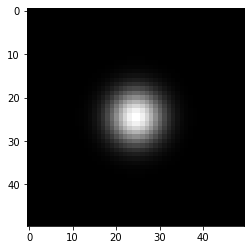

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.signal import convolve2d

# Create a gaussian blur filter by hand
x = np.linspace(-6, 6, 50) # The filter will involve a box of 50 x 50 pixels at a time
fx = norm.pdf(x, loc=0, scale=1) # This is a 1D  filter with 50 pixes
# A gaussian blur filter is a 2D spherical filter. Let's turn it into a 2D gaussian function
filter = np.outer(fx, fx) # `filter` is a discrete table the 2D normal with 50x50 entries

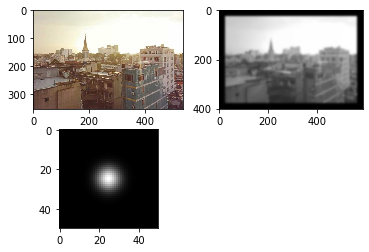

In [25]:

# Applies the 50x50 filter over the image. It auto adds padding in the edges.
# We work with a B&W image because we are dealing with a 2D filter. You can only convolve functions in the same dimension
blurred_image = convolve2d(gray, filter)
plt.subplot(2,2,1)
plt.imshow(im, cmap='gray');
plt.subplot(2,2,3)
plt.imshow(filter, cmap='gray');
plt.subplot(2,2,2)
plt.imshow(blurred_image, cmap='gray');

# Exercise: edge detection convolution filter

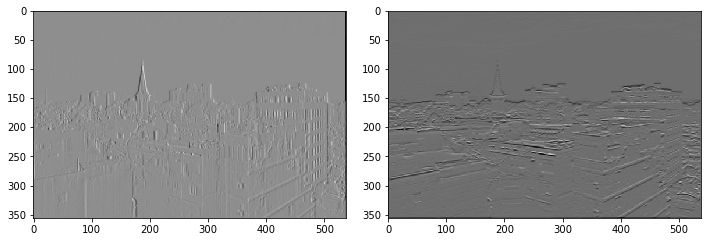

In [37]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

im = Image.open('img/section-3-matplotlib/dummy-image.jpeg')
gray = np.mean(im, axis=2)

Hx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
Hy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
Gx = convolve2d(gray, Hx)
Gy = convolve2d(gray, Hy)

fig, ax = plt.subplots(1, 2, figsize=(10,7))
fig.tight_layout()
ax[0].imshow(Gx, cmap="gray")
ax[1].imshow(Gy, cmap="gray")

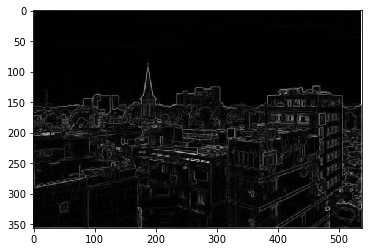

In [35]:
G = np.sqrt(Gx**2 + Gy**2)
plt.imshow(G, cmap="gray")